In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.axes import Axes
import pandas as pd
import itertools
import os
import pandas as pd
from Bio import SeqIO
from Bio import SeqUtils
import matplotlib.cm as cm

In [2]:
estimated_genome_size = 90000000

In [3]:
NG_range = list(range(0,estimated_genome_size, int(estimated_genome_size/100)))


In [4]:
Scaffold_NG_length = []

In [5]:
sum_dir = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/summaries/'
outdir = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/QC_fig/'

In [6]:
filename = list(os.walk(sum_dir, topdown=False))

In [7]:
assembly_sumamry_files = [x for x in filename[-1][2] if len(x) >14 and x[-14:] =='fa_summary.csv']

In [8]:
assembly_sumamry_files

['v81_cns_ph_ctg_a_ctg.fa_summary.csv',
 'v81_cns_ph_ctg_p_ctg.fa_summary.csv',
 'v91_cns_ph_ctg_a_ctg.fa_summary.csv',
 'v91_cns_ph_ctg_p_ctg.fa_summary.csv',
 'vWJ_Pst79.fa_summary.csv']

In [9]:
all_contig_df = pd.read_csv(sum_dir+assembly_sumamry_files[0])

In [10]:
for x in assembly_sumamry_files[1:]:
    all_contig_df = all_contig_df.append(pd.read_csv(sum_dir+x))

In [11]:
all_contig_df.tail()

,Unnamed: 0,ID,Length,%GC,Assembly,CS_length,CS_length_reverse
2495,2495,scaffold_4,239289,42.849859,vWJ_Pst79.fa,69863001,1401753
2496,2496,scaffold_3,257324,42.892229,vWJ_Pst79.fa,70120325,1162464
2497,2497,scaffold_2,283502,42.804989,vWJ_Pst79.fa,70403827,905140
2498,2498,scaffold_1,303561,43.647241,vWJ_Pst79.fa,70707388,621638
2499,2499,scaffold_0,318077,43.550461,vWJ_Pst79.fa,71025465,318077


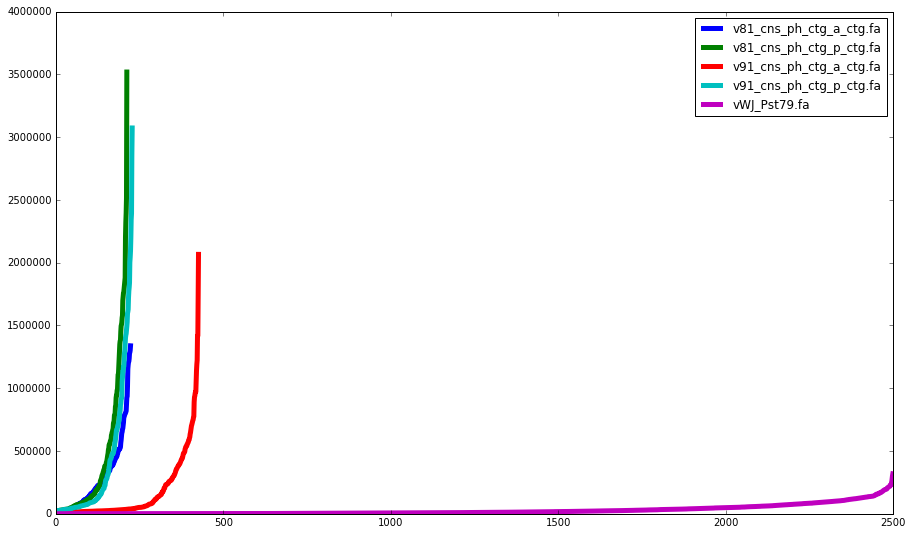

In [12]:
figure  = plt.figure(figsize=(15,9))
all_contig_df.groupby('Assembly')['Length'].plot(lw=5)
plt.legend(loc=1)

In [13]:
set(all_contig_df['Assembly'])

{'v81_cns_ph_ctg_a_ctg.fa',
 'v81_cns_ph_ctg_p_ctg.fa',
 'v91_cns_ph_ctg_a_ctg.fa',
 'v91_cns_ph_ctg_p_ctg.fa',
 'vWJ_Pst79.fa'}

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


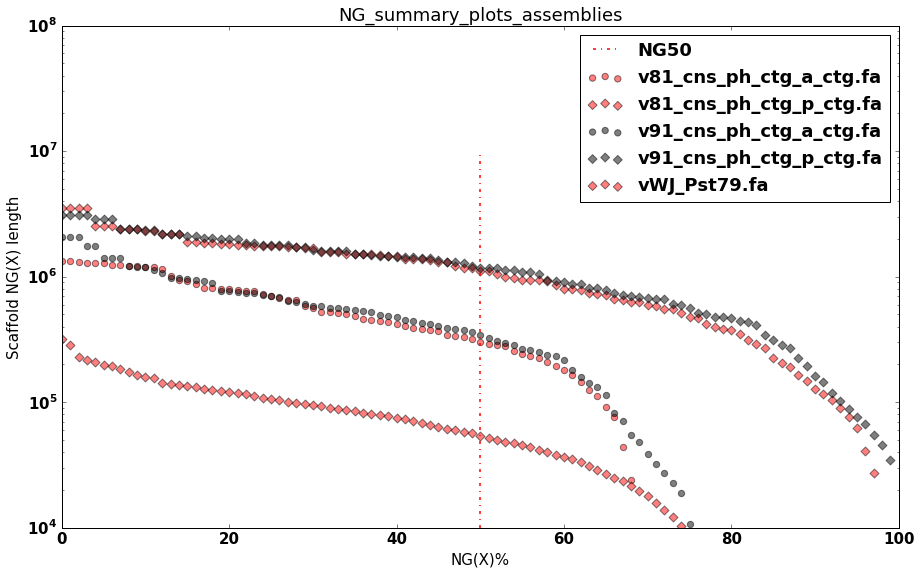

In [27]:
font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
figure  = plt.figure(figsize=(15,9))
plt.xlim(0, 100)
color = 0
assemblies = list(set(all_contig_df['Assembly']))
assemblies.sort()
c = -1
dem = 'test'
colors = ['k', 'r']
markers = ['o' ,'D']
for y in assemblies:
    if 'v91' in y:
        c = 0
    else:
        c = 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    Scaffold_NG_length=[]
    for x in NG_range:
        #print(contig_df['Length'][contig_df['CS_length']>x].min())
        Scaffold_NG_length.append(all_contig_df['Length'][(all_contig_df['CS_length_reverse']>x) & (all_contig_df['Assembly'] == y)].max())
    color += 0.5
    plt.scatter(range(0,100,1), Scaffold_NG_length,  c = colors[c], marker=markers[t] , label=y, s=40, alpha = 0.5)
    color += 1
    #print(color)
plt.semilogy()
plt.title('NG_summary_plots_assemblies')
plt.ylabel('Scaffold NG(X) length')
plt.xlabel('NG(X)%')
plt.plot((50, 50), plt.ylim(), 'r-.',  lw=1.5, label='NG50')
plt.legend(loc=1)
plt.savefig(outdir+'v91_vs_v81_NG_summary_plots_assemblies.png',dpi =300)

In [15]:
all_contig_df.tail()

,Unnamed: 0,ID,Length,%GC,Assembly,CS_length,CS_length_reverse
2495,2495,scaffold_4,239289,42.849859,vWJ_Pst79.fa,69863001,1401753
2496,2496,scaffold_3,257324,42.892229,vWJ_Pst79.fa,70120325,1162464
2497,2497,scaffold_2,283502,42.804989,vWJ_Pst79.fa,70403827,905140
2498,2498,scaffold_1,303561,43.647241,vWJ_Pst79.fa,70707388,621638
2499,2499,scaffold_0,318077,43.550461,vWJ_Pst79.fa,71025465,318077


In [16]:
list(set(all_contig_df['Assembly'])).sort()

In [17]:
'a_ctg' in 'lasfjals_a_ctg_asdfaf'

True

In [18]:
int(all_contig_df['Length'].max()*1.2/15)

281484

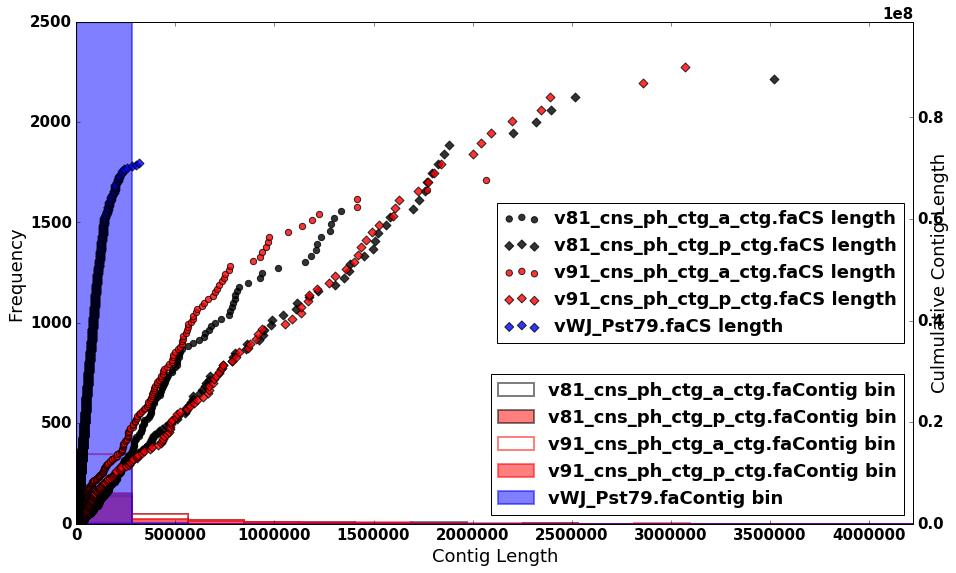

In [19]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }


colors = ['k', 'r','b']
markers = ['o' ,'D']
fig, ax1 = plt.subplots(figsize=(15,9))
dem = 'test'
c = -1
assemblies = list(set(all_contig_df['Assembly']))
assemblies.sort()
hist_range = list(range(0,int(all_contig_df['Length'].max()*1.2), int(all_contig_df['Length'].max()*1.2/15)))
fill = ['w', 'r','b' ]
for y in assemblies:
    plt.xlim(0, all_contig_df["Length"].max()*1.2)
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    if 'p_ctg' in y:
        t = 1
    if 'vWJ' in y:
        t =2
    all_contig_df[all_contig_df["Assembly"] == y]['Length'].plot.hist(bins= hist_range, color= fill[t], alpha = 0.5,edgecolor= colors[c], linewidth = 2, label = y + 'Contig bin')
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.title('Contig Length Distribution '+file_name)
    dem = y
plt.legend(loc=4)

#second plot
ax2 = ax1.twinx()
c = -1
dem = 'test'

for y in assemblies:
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    plt.scatter(all_contig_df[all_contig_df["Assembly"] == y]['Length'], all_contig_df[all_contig_df["Assembly"] == y]['CS_length'],s=40, alpha = 0.8, c=colors[c], marker = markers[t], label= y +'CS length')
    plt.ylim(0, all_contig_df['CS_length'].max()*1.1)
    plt.xlim(0, all_contig_df['Length'].max()*1.2)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)
    dem = y
    plt.legend(loc=5)

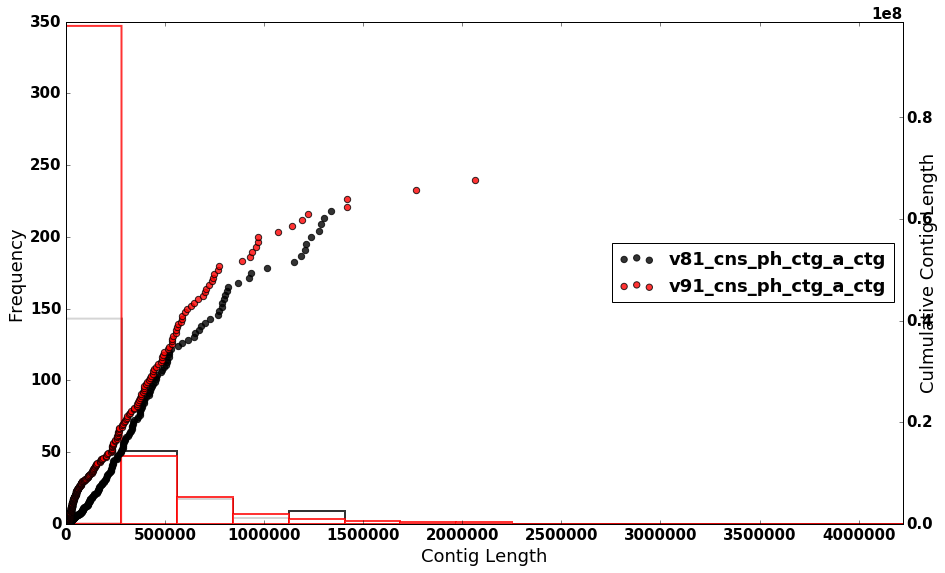

In [26]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }


colors = ['k', 'r']
markers = ['o' ,'D']
fig, ax1 = plt.subplots(figsize=(15,9))
dem = 'test'
c = -1
assemblies = list(set(all_contig_df['Assembly']))
assemblies.sort()
hist_range = list(range(0,int(all_contig_df['Length'].max()*1.2), int(all_contig_df['Length'].max()*1.2/15)))
fill = ['w', colors[c]]
lista = [x for x in assemblies if 'a_ctg' in x]
for y in lista:
    plt.xlim(0, all_contig_df["Length"].max()*1.2)
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    all_contig_df[all_contig_df["Assembly"] == y]['Length'].plot.hist(bins= hist_range, color= fill[t], alpha = 0.8,edgecolor= colors[c], linewidth = 2)
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.title('Contig Length Distribution '+file_name)
    dem = y
#plt.legend(loc=4)

#second plot
ax2 = ax1.twinx()
c = -1
dem = 'test'
for y in lista:
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    plt.scatter(all_contig_df[all_contig_df["Assembly"] == y]['Length'], all_contig_df[all_contig_df["Assembly"] == y]['CS_length'],s=40, alpha = 0.8, c=colors[c], marker = markers[t], label= y[0:20] )
    plt.ylim(0, all_contig_df['CS_length'].max()*1.1)
    plt.xlim(0, all_contig_df['Length'].max()*1.2)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)
    dem = y
    plt.legend(loc=5)
plt.savefig(outdir+'v91_vs_v81_a_ctg.png',dpi =300)

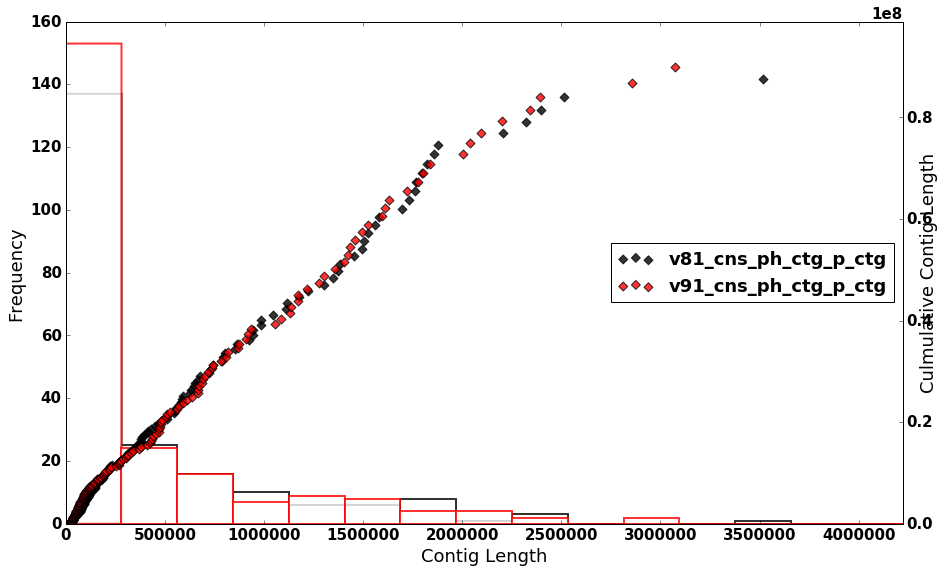

In [25]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }


colors = ['k', 'r']
markers = ['o' ,'D']
fig, ax1 = plt.subplots(figsize=(15,9))
dem = 'test'
c = -1
assemblies = list(set(all_contig_df['Assembly']))
assemblies.sort()
hist_range = list(range(0,int(all_contig_df['Length'].max()*1.2), int(all_contig_df['Length'].max()*1.2/15)))
fill = ['w', colors[c]]
listp = [x for x in assemblies if 'p_ctg' in x]
for y in listp:
    plt.xlim(0, all_contig_df["Length"].max()*1.2)
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 1
    else:
        t = 0
    all_contig_df[all_contig_df["Assembly"] == y]['Length'].plot.hist(bins= hist_range, color= fill[t], alpha = 0.8,edgecolor= colors[c], linewidth = 2)
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.title('Contig Length Distribution '+file_name)
    dem = y
#plt.legend(loc=4)

#second plot
ax2 = ax1.twinx()
c = -1
dem = 'test'
for y in listp:
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    plt.scatter(all_contig_df[all_contig_df["Assembly"] == y]['Length'], all_contig_df[all_contig_df["Assembly"] == y]['CS_length'],s=40, alpha = 0.8, c=colors[c], marker = markers[t], label= y[0:20] )
    plt.ylim(0, all_contig_df['CS_length'].max()*1.1)
    plt.xlim(0, all_contig_df['Length'].max()*1.2)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)
    dem = y
    plt.legend(loc=5)
plt.savefig(outdir+'v91_vs_v81_p_ctg.png', dpi=300)

In [22]:
assemblies

['v81_cns_ph_ctg_a_ctg.fa',
 'v81_cns_ph_ctg_p_ctg.fa',
 'v91_cns_ph_ctg_a_ctg.fa',
 'v91_cns_ph_ctg_p_ctg.fa',
 'vWJ_Pst79.fa']

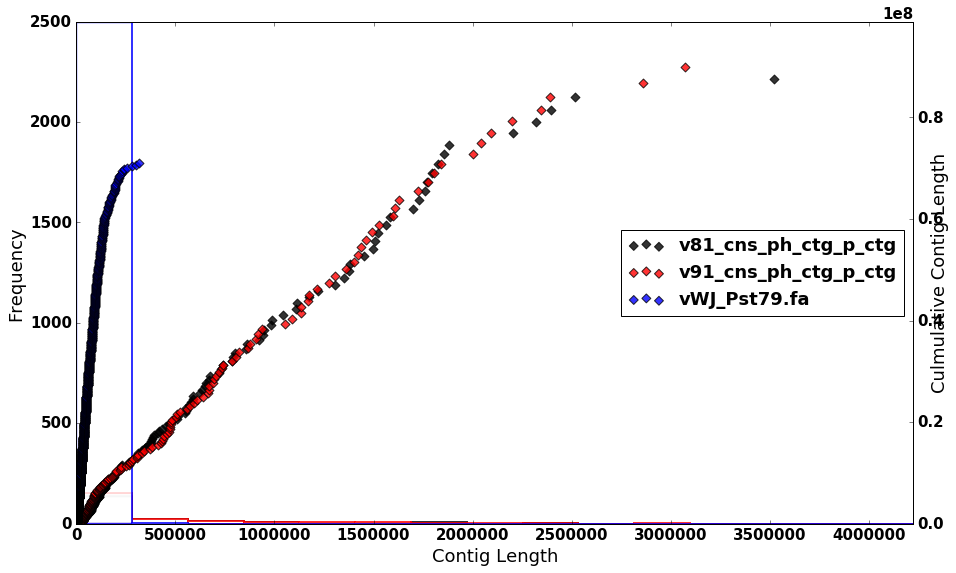

In [24]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }


colors = ['k', 'r', 'b']
markers = ['o' ,'D']
fig, ax1 = plt.subplots(figsize=(15,9))
dem = 'test'
c = -1
assemblies = list(set(all_contig_df['Assembly']))
assemblies.sort()
hist_range = list(range(0,int(all_contig_df['Length'].max()*1.2), int(all_contig_df['Length'].max()*1.2/15)))
fill = ['w', colors[c]]
listp = [x for x in assemblies if 'p_ctg' in x]
listp.append(assemblies[-1])
for y in listp:
    plt.xlim(0, all_contig_df["Length"].max()*1.2)
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 1
    else:
        t = 0
    all_contig_df[all_contig_df["Assembly"] == y]['Length'].plot.hist(bins= hist_range, color= fill[t], alpha = 0.8,edgecolor= colors[c], linewidth = 2)
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.title('Contig Length Distribution '+file_name)
    dem = y
#plt.legend(loc=4)

#second plot
ax2 = ax1.twinx()
c = -1
dem = 'test'
for y in listp:
    if y[0:3] == dem[0:3]:
        c = c
    else:
        c += 1
    if 'a_ctg' in y:
        t = 0
    else:
        t = 1
    plt.scatter(all_contig_df[all_contig_df["Assembly"] == y]['Length'], all_contig_df[all_contig_df["Assembly"] == y]['CS_length'],s=40, alpha = 0.8, c=colors[c], marker = markers[t], label= y[0:20] )
    plt.ylim(0, all_contig_df['CS_length'].max()*1.1)
    plt.xlim(0, all_contig_df['Length'].max()*1.2)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)
    dem = y
    plt.legend(loc=5)
plt.savefig(outdir+'v91_vs_v81_vs_vWJ_p_ctg.png', dpi=300)